In [11]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("100M_all_chr_core.ld", sep='\t')
df.shape


(156950, 9)

In [12]:
df['dist'] = abs(df['BP_A'] - df['BP_B'])
df.head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,dist
0,1,1752955,rs4648726,0.253195,1,2754512,rs6680471,0.288738,-0.258363,1001557
1,1,1752955,rs4648726,0.253195,1,3755675,rs1891941,0.210463,-0.049471,2002720
2,1,1752955,rs4648726,0.253195,1,4756276,rs7518469,0.071286,-0.018682,3003321
3,1,1752955,rs4648726,0.253195,1,5758772,rs7521197,0.178914,0.110411,4005817
4,1,1752955,rs4648726,0.253195,1,6761261,rs429383,0.149760,-0.030746,5008306


In [13]:
df = df[(df["MAF_A"]>0.1) | (df["MAF_B"]>0.1)]
df.shape

(152393, 10)

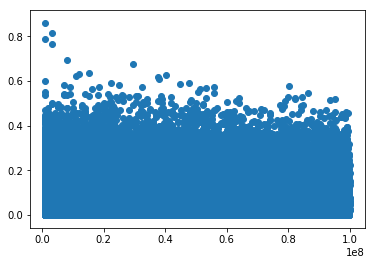

In [14]:
plt.scatter(x=df['dist'], y=abs(df['R']))
plt.show()

In [22]:
df[abs(df.R)>0.5].head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,dist
6465,1,76961960,rs10873889,0.379393,1,103071348,rs1517433,0.180511,0.530707,26109388
6479,1,76961960,rs10873889,0.379393,1,117121865,rs12066192,0.382388,0.625253,40159905
6498,1,76961960,rs10873889,0.379393,1,159069211,rs1894043,0.465256,0.517286,82107251
8429,1,103071348,rs1517433,0.180511,1,117121865,rs12066192,0.382388,0.543262,14050517
9498,1,117121865,rs12066192,0.382388,1,159069211,rs1894043,0.465256,0.530010,41947346


In [24]:
df[(df['SNP_B']=="rs8185850")| (df['SNP_A']=="rs8185850")].head()


,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,dist
94366,8,1165148,rs7388163,0.309704,8,43581443,rs8185850,0.266973,-0.150707,42416295
94462,8,2166253,rs7828819,0.356030,8,43581443,rs8185850,0.266973,0.314530,41415190
94558,8,3167217,rs10086567,0.181110,8,43581443,rs8185850,0.266973,-0.031765,40414226
94654,8,4167608,rs4875322,0.167532,8,43581443,rs8185850,0.266973,-0.114110,39413835
94750,8,5168886,rs12334622,0.311502,8,43581443,rs8185850,0.266973,0.287482,38412557


In [25]:
df[(df['SNP_B']=="rs2353200")| (df['SNP_A']=="rs2353200")].head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,dist
94367,8,1165148,rs7388163,0.309704,8,46924211,rs2353200,0.21885,-0.106012,45759063
94463,8,2166253,rs7828819,0.356030,8,46924211,rs2353200,0.21885,0.242798,44757958
94559,8,3167217,rs10086567,0.181110,8,46924211,rs2353200,0.21885,0.001122,43756994
94655,8,4167608,rs4875322,0.167532,8,46924211,rs2353200,0.21885,-0.103106,42756603
94751,8,5168886,rs12334622,0.311502,8,46924211,rs2353200,0.21885,0.221595,41755325


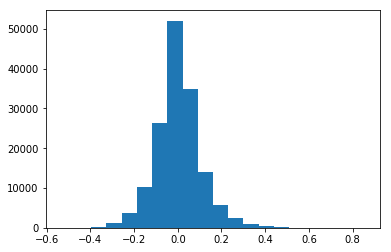

In [28]:
plt.hist(df[df['dist']>1*10**6]['R'], bins = 20)
plt.show()

In [19]:
threshold = abs(df.R).quantile(0.95)
threshold

0.21944139999999998

In [20]:
rs_ids_to_delete = set(df[abs(df.R)>threshold][['SNP_A', 'SNP_B']].values.T.ravel())
len(rs_ids_to_delete)

1220

In [30]:
core_table = pd.read_table('core_snps.csv')
core_table.head()

,ref_rs_id,ref_chr,ref_bp,ref_af,ref_allele,ref_other_allele,ref_snp_num
0,rs4648726,1,1752955,0.06759,C,T,4648726
1,rs6680471,1,2754512,0.53180,C,T,6680471
2,rs1891941,1,3755675,0.94433,C,T,1891941
3,rs7518469,1,4756276,0.94036,G,T,7518469
4,rs7521197,1,5758772,0.07654,C,T,7521197


In [50]:
core_table = core_table[~core_table.ref_rs_id.isin(rs_ids_to_delete)]
core_table.shape

(1439, 7)

In [51]:
core_table.to_csv("core_snps_filtered.csv", index=False, sep='\t')